# Bussiness Problem:Predicting Whether a patient is suffering from heart diesease or not with using given features

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
data1=pd.read_csv('values.csv') #Importing First Dataset

In [50]:
data2=pd.read_csv('labels.csv') #Importing Second Dataset

In [51]:
from sqlalchemy import create_engine

In [52]:
data=pd.merge(data1,data2,how="left" , on=["patient_id"]) #merging both the datasets

In [53]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [54]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

# Univariate Analysis

In [56]:
import sweetviz as sv

In [57]:
my_report=sv.analyze(data)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl'>

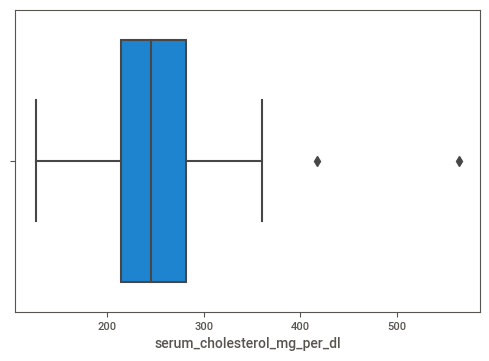

In [59]:
# checking outliers
sns.boxplot(x=data.serum_cholesterol_mg_per_dl)

In [60]:
#treating outlier in serum_cholesterol_mg_per_dl
data.serum_cholesterol_mg_per_dl.mean()

249.2111111111111

In [61]:
data.serum_cholesterol_mg_per_dl.std()

52.71796879049311

In [62]:
upper_limit = data.serum_cholesterol_mg_per_dl.mean() + 3*data.serum_cholesterol_mg_per_dl.std()
upper_limit

407.3650174825905

In [63]:
lower_limit = data.serum_cholesterol_mg_per_dl.mean() - 3*data.serum_cholesterol_mg_per_dl.std()
lower_limit

91.05720473963177

In [64]:
data[(data.serum_cholesterol_mg_per_dl>upper_limit) | (data.serum_cholesterol_mg_per_dl<lower_limit)]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,yx0q6k,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,rv6siv,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [66]:
data=data[(data.serum_cholesterol_mg_per_dl<upper_limit) & (data.serum_cholesterol_mg_per_dl>lower_limit)]
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


<AxesSubplot:xlabel='oldpeak_eq_st_depression'>

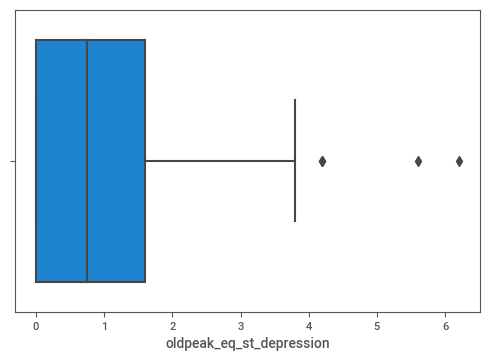

In [67]:
# checking outlier in oldpeak_eq_st_depression
sns.boxplot(x=data.oldpeak_eq_st_depression)

In [68]:
# treating outlier in oldpeak_eq_st_depression using IQR
Q1= data.oldpeak_eq_st_depression.quantile(0.25)
Q3= data.oldpeak_eq_st_depression.quantile(0.75)
Q1 , Q3

(0.0, 1.6)

In [69]:
IQR = Q3-Q1
IQR

1.6

In [70]:
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_limit,upper_limit

(-2.4000000000000004, 4.0)

In [71]:
data[(data.oldpeak_eq_st_depression>upper_limit) | (data.oldpeak_eq_st_depression<lower_limit)]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
112,6r9x2j,2,reversible_defect,140,4,3,0,0,298,4.2,1,51,122,1,1
140,noxsnw,3,reversible_defect,140,4,0,0,0,217,5.6,1,55,111,1,1
162,usnkhx,3,reversible_defect,160,4,3,0,2,164,6.2,0,62,145,0,1


In [73]:
data=data[(data.oldpeak_eq_st_depression<upper_limit) & (data.oldpeak_eq_st_depression>lower_limit)]
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [74]:
data.drop(data.columns[[0]], axis = 1,inplace=True) #dropping patient ID

<AxesSubplot:xlabel='resting_blood_pressure'>

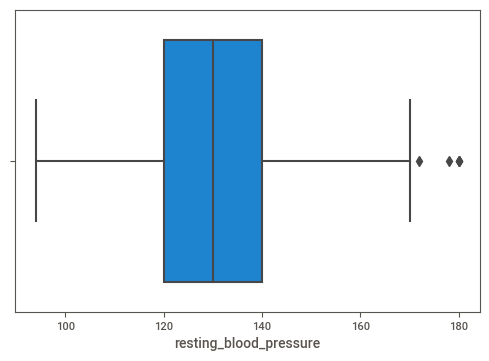

In [78]:
# checking outlier in resting_blood_pressure
sns.boxplot(x=data.resting_blood_pressure)

In [83]:
# Treatment using IQR
Q1= data.resting_blood_pressure.quantile(0.25)
Q3= data.resting_blood_pressure.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_limit,upper_limit

(90.0, 170.0)

In [84]:
data[(data.resting_blood_pressure>upper_limit) | (data.resting_blood_pressure<lower_limit)]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [85]:
data=data[(data.resting_blood_pressure<upper_limit) & (data.resting_blood_pressure>lower_limit)]
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,normal,140,4,0,0,0,239,1.2,1,54,160,0,0
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


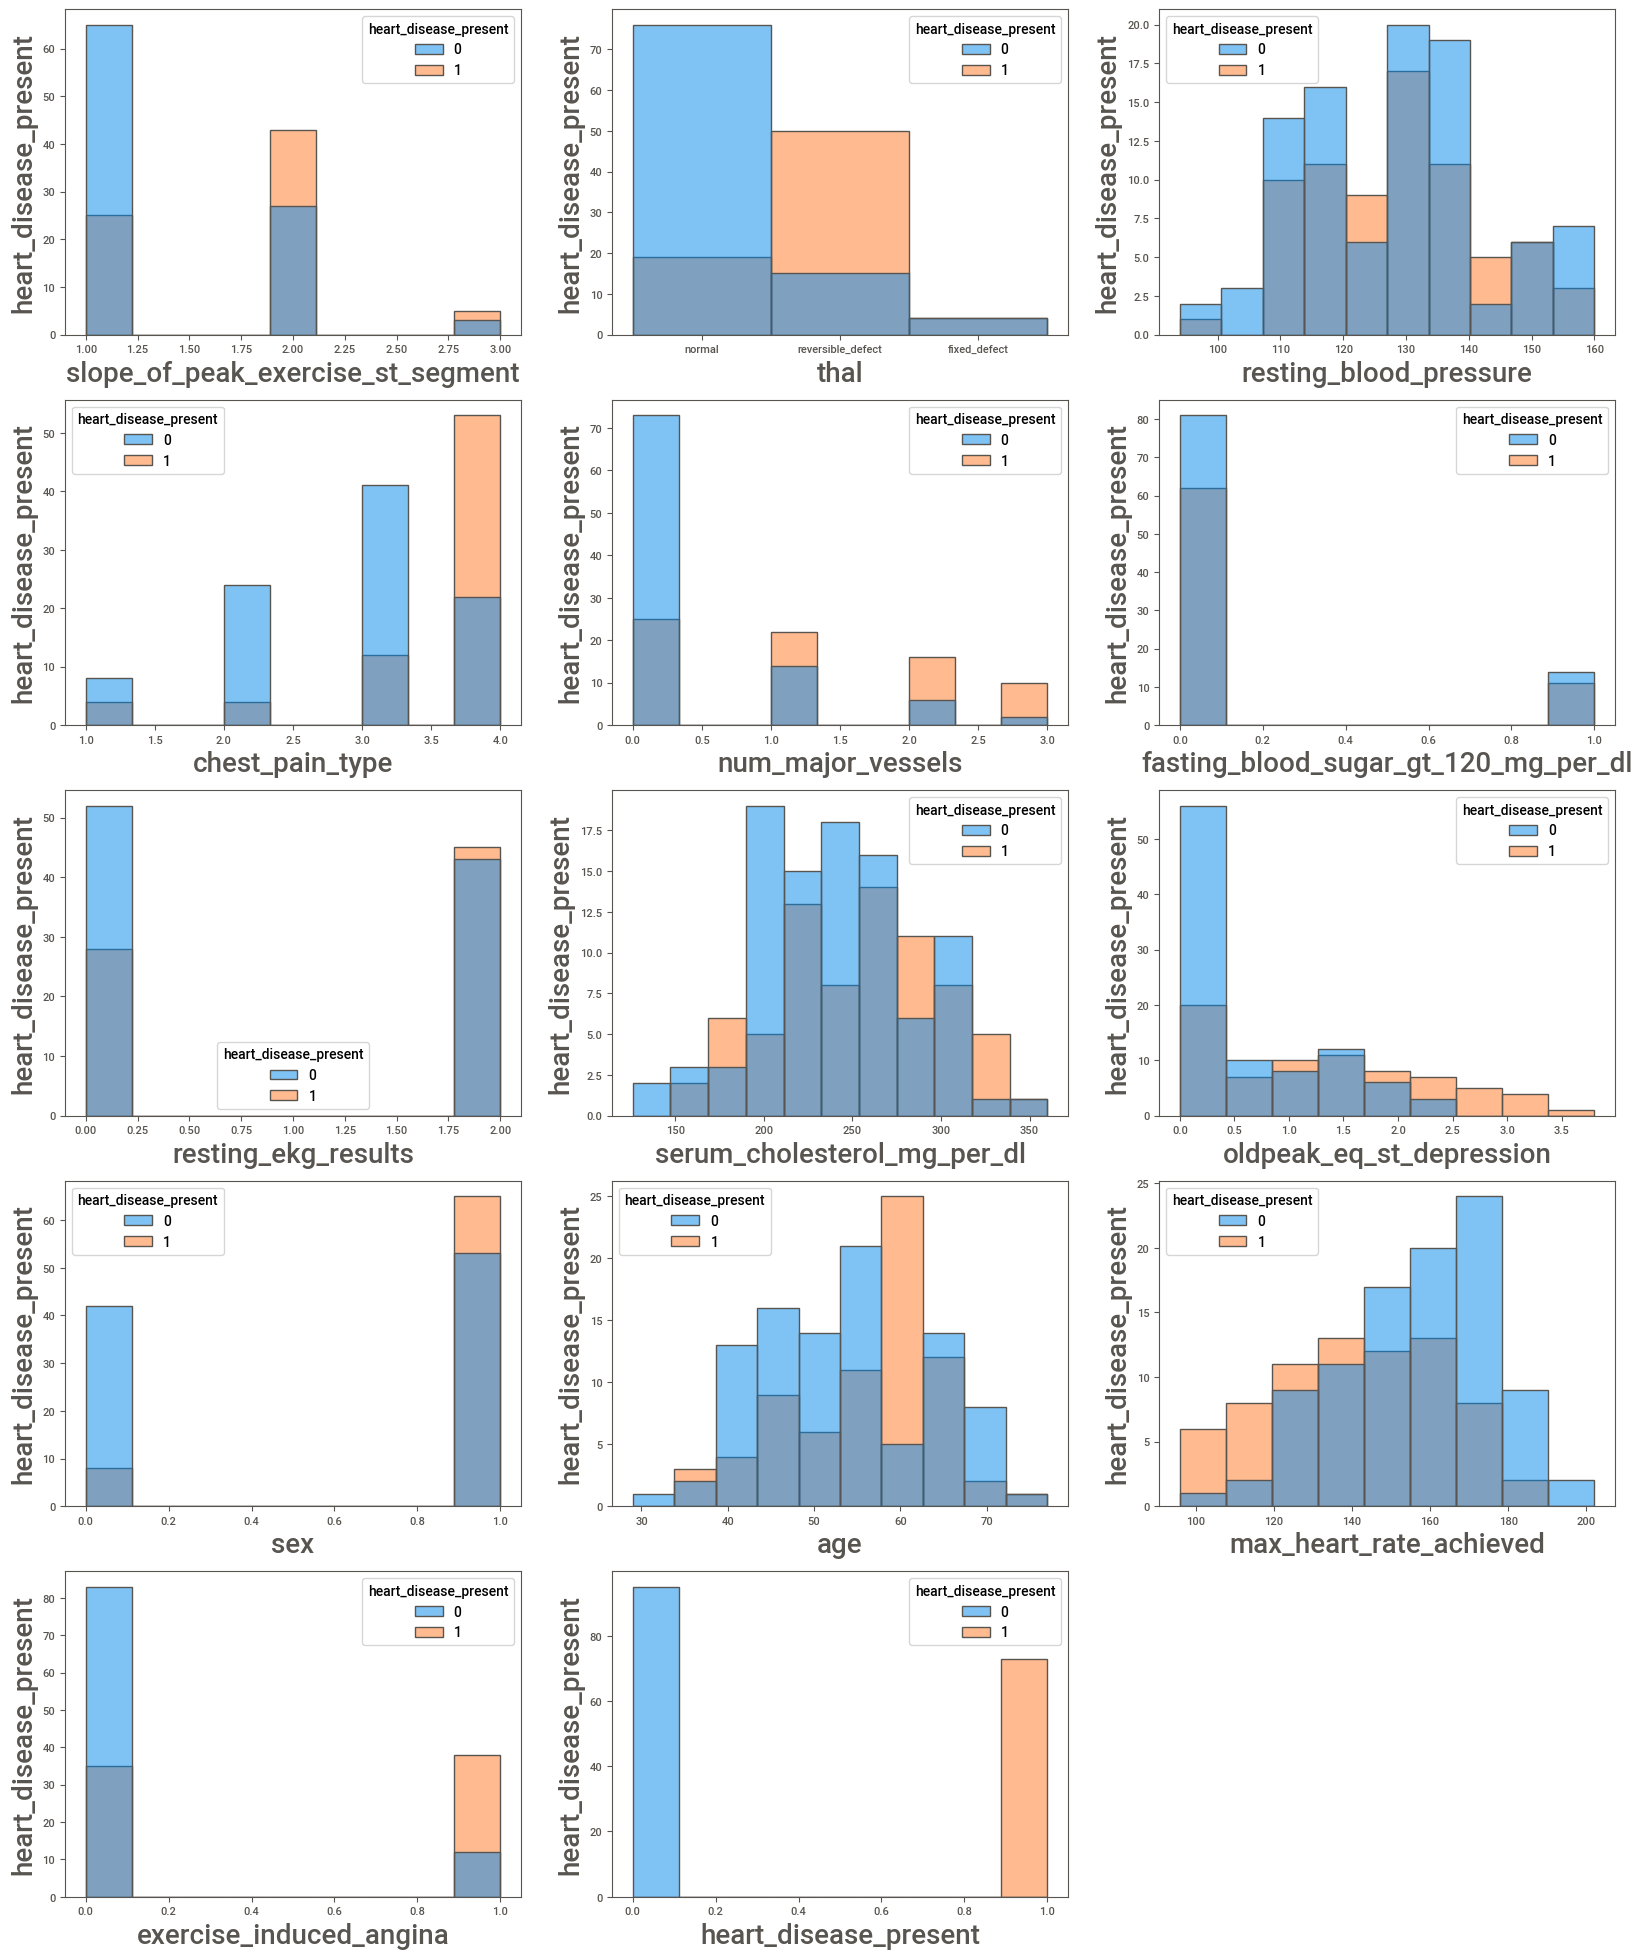

In [86]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 : # as there are 14 columns in the dataset.
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(x=data[column],hue=data.heart_disease_present)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1
plt.show()

# Model Creation

In [87]:
## defining x and y and creating dependent and independent variables
x=data.drop(columns = ['heart_disease_present']) ## independent varable
y= data['heart_disease_present'] ## dependent or target variable

In [88]:
dataset = pd.get_dummies(data, columns = ['sex', 'chest_pain_type', 'slope_of_peak_exercise_st_segment', 'num_major_vessels', 'exercise_induced_angina', 'thal', 'fasting_blood_sugar_gt_120_mg_per_dl'])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'max_heart_rate_achieved']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [90]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(dataset[columns_to_scale],y, test_size= 0.25,random_state=355)

# Logistic Regression

In [122]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [123]:
## testing of a model
y_pred = log_reg.predict(x_test)

In [124]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.53      0.69      0.60        13

    accuracy                           0.71        42
   macro avg       0.68      0.71      0.69        42
weighted avg       0.74      0.71      0.72        42



# KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
## taking optimal k how many clusters to create
error_rate = []
# Will take some time
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

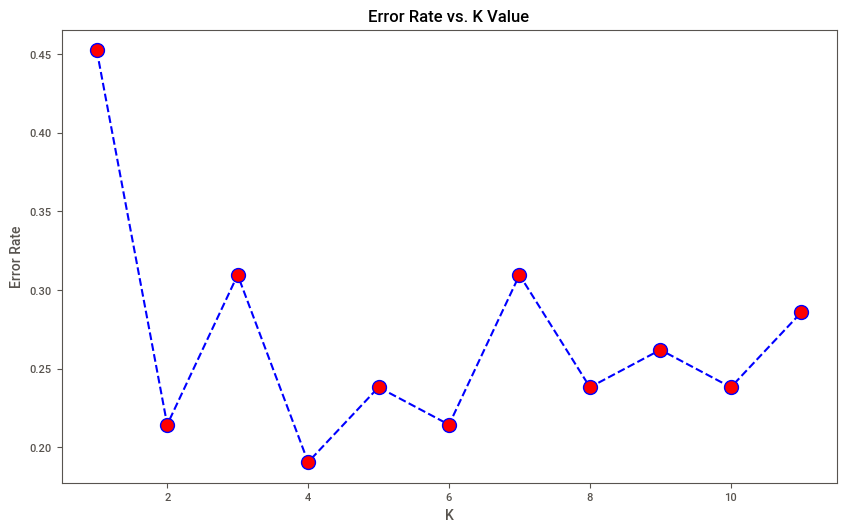

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [102]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [103]:
y_pred = knn.predict(x_test)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.73      0.62      0.67        13

    accuracy                           0.81        42
   macro avg       0.78      0.76      0.77        42
weighted avg       0.80      0.81      0.80        42



# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
y_predict=rf_clf.predict(x_test)

In [111]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.55      0.46      0.50        13

    accuracy                           0.71        42
   macro avg       0.66      0.64      0.65        42
weighted avg       0.70      0.71      0.71        42



# Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat=dt.predict(x_test)

In [113]:
## Evalauting the model
y_train_predict=dt.predict(x_train)
cc_train=accuracy_score(y_train,y_train_predict)
cc_train

1.0

In [114]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        60

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [115]:
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.6428571428571429

In [116]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.44      0.62      0.52        13

    accuracy                           0.64        42
   macro avg       0.62      0.64      0.62        42
weighted avg       0.68      0.64      0.65        42



# Conclusion: From KNN we are getting Highest Accuracy.